In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [13]:


# Assuming you have already loaded and preprocessed the data into a DataFrame called 'data'
file=pd.read_csv('/content/Mall_Customers.csv')



In [14]:
file.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
file.drop('CustomerID',axis=1,inplace=True)
file['Gender']=file['Gender'].map({'Male':0,'Female':1})

In [16]:
# Select relevant features for segmentation
selected_features = ['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']
X = file[selected_features]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


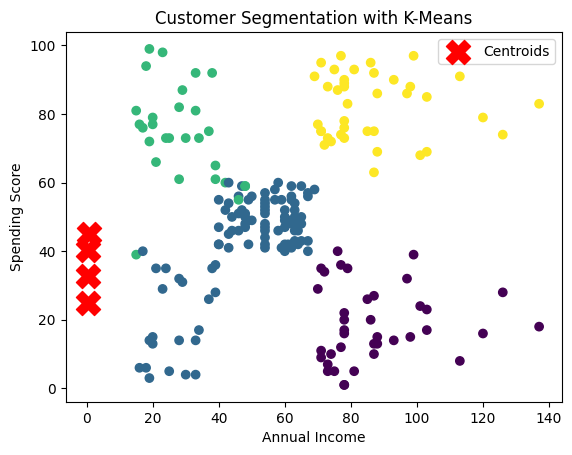

In [20]:

# Choose the number of clusters (K)
num_clusters = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
file['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (assuming 2D data for simplicity)
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'] ,c=file['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation with K-Means')
plt.legend()
plt.show()